4명의 키와 몸무게 계산 (합계, 평균, 편차, 분산, 표준편차, 상관계수)
1. python을 이용
2. numpy를 이용

## 1. python

In [2]:
height = [175,165,180,160]
weight = [75,70,95,72]

* 합계 weight, height

In [5]:
h_sum = sum(height)
w_sum = sum(weight)

In [7]:
print('키 합계 :{}, 몸무게 합계 : {}'. format(h_sum,w_sum))

키 합계 :680, 몸무게 합계 : 312


* 평균 weight, height

In [10]:
h_mean = h_sum / len(height)
w_mean = w_sum / len(weight)

In [12]:
print('키 평균 :{}, 몸무게 평균 : {}'. format(h_mean,w_mean))

키 평균 :170.0, 몸무게 평균 : 78.0


* 편차 weight, height
* 편차 : 평균 - 각 변수의 값 
* 편차를 다 더한다면 항상 0

In [22]:
h_deviation = []
for i in height:
    h_deviation.append(i - h_mean)
w_deviation = []
for i in weight:
    w_deviation.append(i - w_mean)

In [23]:
print(h_deviation)
print(w_deviation)

[5.0, -5.0, 10.0, -10.0]
[-3.0, -8.0, 17.0, -6.0]


In [35]:
h_deviation = []
h_devsum = 0
w_devsum = 0
for i in height:
    h_deviation.append(i - h_mean)
    h_devsum += (i - h_mean)
w_deviation = []
for i in weight:
    w_deviation.append(i - w_mean)
    w_devsum += (i - w_mean)

In [36]:
print(h_devsum, w_devsum)

0.0 0.0


In [38]:
# 더 편한 방법
h_deviation = [i - h_mean for i in height]
w_deviation = [i - w_mean for i in weight]

In [41]:
print('키 편차 : {}, 몸무게 편차 : {}'.format(h_deviation,w_deviation))
print('키 편차 합계 : {}, 몸무게 편차 합계 : {}'.format(sum(h_deviation),sum(w_deviation)))

키 편차 : [5.0, -5.0, 10.0, -10.0], 몸무게 편차 : [-3.0, -8.0, 17.0, -6.0]
키 편차 합계 : 0.0, 몸무게 편차 합계 : 0.0


* 분산 weight, height

In [54]:
h_data = [(i - h_mean)**2 for i in height]
w_data = [(i - w_mean)**2 for i in weight]
h_variance = sum(h_data)/len(h_data)
w_variance = sum(w_data)/len(w_data)

In [55]:
h_variance,w_variance

(62.5, 99.5)

* 표준편차 weight height

In [56]:
# 제곱근을 쓸 때는 math 임포트 math.sqrt
import math
math.sqrt


<function math.sqrt(x, /)>

In [57]:
h_std = math.sqrt(h_variance)
w_std = math.sqrt(w_variance)

In [58]:
h_std,w_std

(7.905694150420948, 9.974968671630002)

In [63]:
print('키 표준편차 : {0:0.3f}, 몸무게 표준편차 : {0:0.3f}' .format(h_std,w_std))

키 표준편차 : 7.906, 몸무게 표준편차 : 7.906


* 공분산 height weight
* 키에 대한 편차 곱하기 몸무게에 대한 편차
* 같은 위치에 있는 편차끼리 곱하고 더함 그리고 나누기
* sample covariance (n-1)

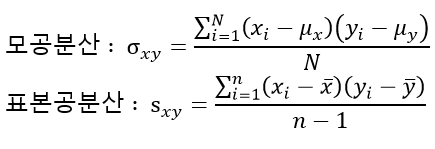

In [75]:
print(h_deviation)
print(w_deviation)

[5.0, -5.0, 10.0, -10.0]
[-3.0, -8.0, 17.0, -6.0]


In [85]:
cov_data = [h_deviation[i] * w_deviation[i] for i in range(len(h_deviation))]

In [133]:
sum(cov_data)/len(cov_data)

63.75

In [90]:
# zip 이용하는 방법
h_w_covariance = [i*j for i,j in zip(h_deviation, w_deviation)]
print(h_w_covariance)
h_w_covariance = sum(h_w_covariance) / len(h_w_covariance)
print(h_w_covariance)

[-15.0, 40.0, 170.0, 60.0]
63.75


* 상관계수 weight height
* correlational coefficient
* 상관계수 (r) : 공분산 / (표준편차1 * 표준편차2)

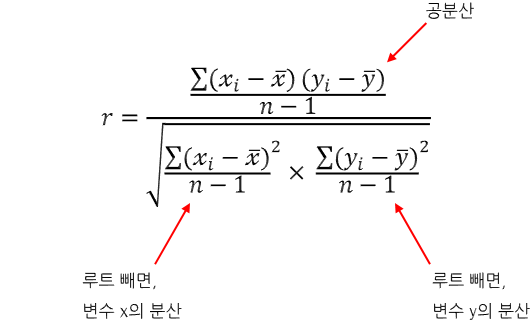

In [92]:
h_w_coef = h_w_covariance / (h_std * w_std)
h_w_coef

0.8084043468090077

In [93]:
print('키와 몸무게의 상관계수 : {0:0.3f}'.format(h_w_coef))

키와 몸무게의 상관계수 : 0.808


### 지금까지 했던 거 numpy로 간단하게 가능
* sum, mean, var, cov, coef 등은 Scipy에서 없어지고 numpy에서 사용하도록 권장하고 있다.
* 즉, numpy 이용해라

In [94]:
import numpy as np

* 데이터를 배열로 생성하기 np.array()사용

In [97]:
height = np.array([175,165,180,160])
weight = np.array([75,70,95,72])

합계

In [100]:
np.sum(height), np.sum(weight)

(680, 312)

평균

In [102]:
np.mean(height), np.mean(weight)

(170.0, 78.0)

편차 
* numpy에서는 제공 안함
* python 방식으로 해야함

In [112]:
print([i - np.mean(height) for i in height])
print([i - np.mean(weight) for i in weight])

[5.0, -5.0, 10.0, -10.0]
[-3.0, -8.0, 17.0, -6.0]


In [115]:
# numpy에서는 broadcasting이 가능하니까 이렇게도 가능
h_deviation = height - h_mean
w_deviation = weight - w_mean

In [116]:
h_deviation, w_deviation

(array([  5.,  -5.,  10., -10.]), array([-3., -8., 17., -6.]))

분산
* python방식이랑 값이 다르게 나옴
* ddof = 0 (default) --> bias값 무시
* ddof = 1 (통계에서 사용하는 경우) --> bias가 되지 않은 값 리턴
* ddof 값은 분모 값 n-1 의미 

In [123]:
np.var(height, ddof = 0), np.var(weight, ddof = 1)

(62.5, 132.66666666666666)

표준편차

In [107]:
np.std(height), np.std(weight)

(7.905694150420948, 9.974968671630002)

공분산 sample covariance

In [136]:
# 이 방법 틀렸음 height와 weight의 공분산이니까 다음 셀에 있는 방법이 맞음
np.cov(height, ddof = 0), np.cov(weight, ddof = 0)

(array(62.5), array(99.5))

In [135]:
Covariance = np.cov(height, weight, ddof = 0)[0][1]
print(Covariance)

63.75


상관계수

In [127]:
np.corrcoef(height,weight)

array([[1.        , 0.80840435],
       [0.80840435, 1.        ]])

## 다시 정리
* numpy covariance랑 python으로 covariance 값 다른 이유?
* numpy cov는 기본적으로 sample covariance 값 리턴
* python에서도 n-1로 계산하면 같은 값 나옴 

* https://stackoverflow.com/questions/15317822/calculating-covariance-with-python-and-numpy/39098306